# Reinforcement Learning Project
# Train a Smartcab to Drive


## Getting Started

In this project, we will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, we will use the following visualization code.

In [7]:
# Import the visualization code
! wget https://raw.githubusercontent.com/alex-coch/alex-coch.github.io/main/smartcab/visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

--2022-10-03 13:28:46--  https://raw.githubusercontent.com/alex-coch/alex-coch.github.io/main/smartcab/visuals.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7711 (7.5K) [text/plain]
Saving to: ‘visuals.py.1’

visuals.py.1        100%[===================>]   7.53K  --.-KB/s    in 0s      

2022-10-03 13:28:46 (58.9 MB/s) - ‘visuals.py.1’ saved [7711/7711]



### Understanding the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. 

The environment is made up of roads, intersections, the Smartcab, and other agents (cars), that seem to operate within traffic rules. Red and green traffic lights indicate when a car should stop or stay. 

Observations you might make upon running the simulation for the first time, without any learning or smartcab code:

- The Smartcab does not move at all during the simulation.
- The agent is receiving a numerical reward, which is summed up over positive and negative rewards taken with respect to change in the environment, and the age
- The agent receives a positive reward at a red light. That's probably because it is a positive action and the car is supposed to stop at red lights. Conversly, the agent receives a negative reward for staying idle at green lights, as the car is supposed to move.

### Understanding the Code

In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. 

Let's see what the key mechanics of our program are:

- In the **agents.py** Python file: 
    - the *num_dummies* flag changes the number of dummies in the environment. 
    - the *grid_size* flag changes the number of intersections, in a (columns,rows) format.
    - the *update_delay* flag changes the update time of the simulation, i.e. the continuous update time between actions.
- In the **environments.py** Python file, the *act()* function is called when an agent performs an action. The action is only performed if it is legal. 
- In the **simulator.py** Python file, the *render_text()* function renders the non-GUI display of the simulation, i.e. the trial data is rendered in the terminal or command prompt. The *render()* function renders the GUI display of the simualation i.e. the pygame module.
- In the **planner.py** Python file, the *next_waypoint()* function will consider the East-West direction first, after checking if the destination isn't already at the location.

-----
## Implementing a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, we will navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. We have access to several class variables that will help us write this functionality, such as `'self.learning'` and `'self.valid_actions'`.

### Basic Agent Simulation Results
To obtain results from the initial simulation, we will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

--2022-10-03 13:35:14--  https://raw.githubusercontent.com/alex-coch/alex-coch.github.io/main/smartcab/logs/sim_no-learning.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3042 (3.0K) [text/plain]
Saving to: ‘sim_no-learning.csv’

sim_no-learning.csv 100%[===================>]   2.97K  --.-KB/s    in 0s      

2022-10-03 13:35:14 (20.6 MB/s) - ‘sim_no-learning.csv’ saved [3042/3042]



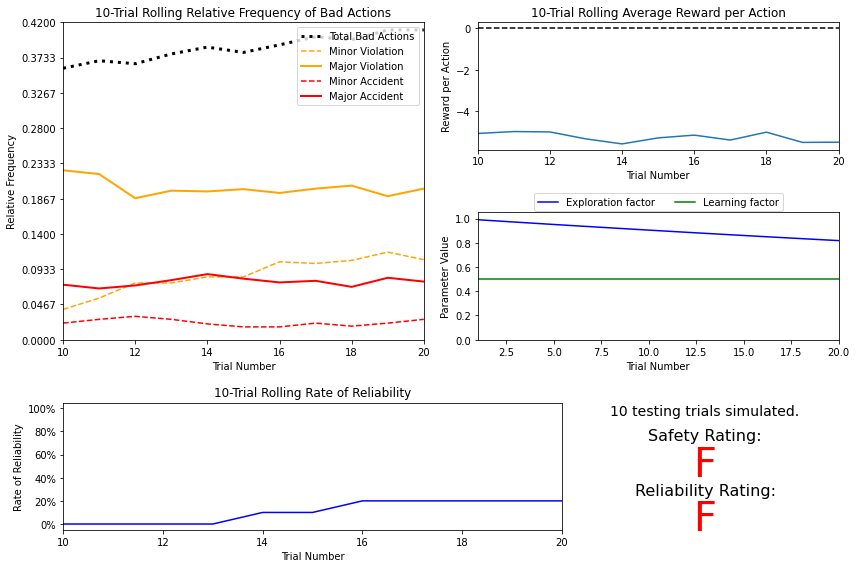

In [9]:
# Load the 'sim_no-learning' log file from the initial simulation results
! wget https://raw.githubusercontent.com/alex-coch/alex-coch.github.io/main/smartcab/logs/sim_no-learning.csv
vs.plot_trials('/content/sim_no-learning.csv')

#### Observations  of a Basic Driving Agent
- The driving agent performs a bad action approximately 40% of the time. 5-10% of the time it results in an accident.
- The rate of reliability is about 10%, but it doesn't make sense as the agent is driving randomly. Even if the rate was higher, we couldn't say the rate of reliability was reliable (pun unintended) because it would be based on chance.
- We see that the agent is actually receiving a negative reward for its actions. This means that the agent is being penalized heavily, and the negative rewards are outweighing the positive rewards, if any.
- There isn't a significant change in the outcome of results, even with the increase in the number of trials. This could be because our agent is still making decisions randomly and not learning from it's mistakes.
- To summarize, the Smartcab would not be considered safe, because it violates traffic rules and causes accidents too often for ur comfort. It will also not be considered reliable, as it only managed to reach its desination 10% of the time. We'd want our cab to at least get us to the airport at time if it's ploughing through the traffic (actually, we don't want that either).

-----
## Informing the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identifying States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

Some questions we can ask ourselves at this stage are: 

*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

The 'waypoint', 'light','oncoming' and 'left' features are most relevant for learning both safety and efficiency. 

The 'waypoint' helps leads the Smartcab to the destination through the most optimal way, improving the efficiency. 

The 'oncoming' and 'left' features contain the intended directions of travel of other cars near the Smartcab in the environment. We don't need to care about cabs on the 'right', as they won't forward on a red light, assuming they follow traffic rules, though we do need to check out for cars on the left before taking a right turn at a traffic light. 

The 'light' feature makes our Smartcab aware of the traffic lights, so that it follows the rules and doesn't violate traffic laws.

These set of input features are important to ensure the safety of the Smartcab and its passengers, as not being aware of other cars can lead to accidents, while being unaware of the traffic lights can lead to traffic violations and/or accidents.

The 'deadline' feature, is not important for the safety of the smartcab, while it may resemble some importance for the efficiency. Nevertheless, the feature isn't chosen as 'important' because the waypoint feature should ensure that the chosen path is as optimal as it can be. 

### Defining a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

Some questions we can ask ourselves at this stage are: 

*If a state is defined using the features you've selected from the previous section, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  

Our chosen state space is (waypoint,lights,oncoming,left). The size will also be smaller than if we did consider using 'deadine' for the state space. 

There are 3 possible values for 'waypoint', 2 possible values for 'lights' and 4 possible values for each of cars on 'left',and 'oncoming' (None, left, right, forward). 

The number of combinations here will, thus, be 3x2x4x4 = 96. So it is a reasonable number of policies for the agent to learn within a reasonable number of training trials. In a few hundred trials, our agent should be able to see each state at-least once. 

### Updating the Driving Agent State
For our second implementation, we will use the `'build_state()'` agent function to set the `'state'` variable to a tuple of all the features necessary for Q-Learning.

-----
## Implementing a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. 

For this project, we will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. 

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that we are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior.

### Q-Learning Simulation Results

To obtain results from the initial Q-Learning implementation, we will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, we can use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

--2022-10-03 13:36:00--  https://raw.githubusercontent.com/alex-coch/alex-coch.github.io/main/smartcab/logs/sim_default-learning.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3075 (3.0K) [text/plain]
Saving to: ‘sim_default-learning.csv.1’

sim_default-learnin 100%[===================>]   3.00K  --.-KB/s    in 0s      

2022-10-03 13:36:01 (29.0 MB/s) - ‘sim_default-learning.csv.1’ saved [3075/3075]



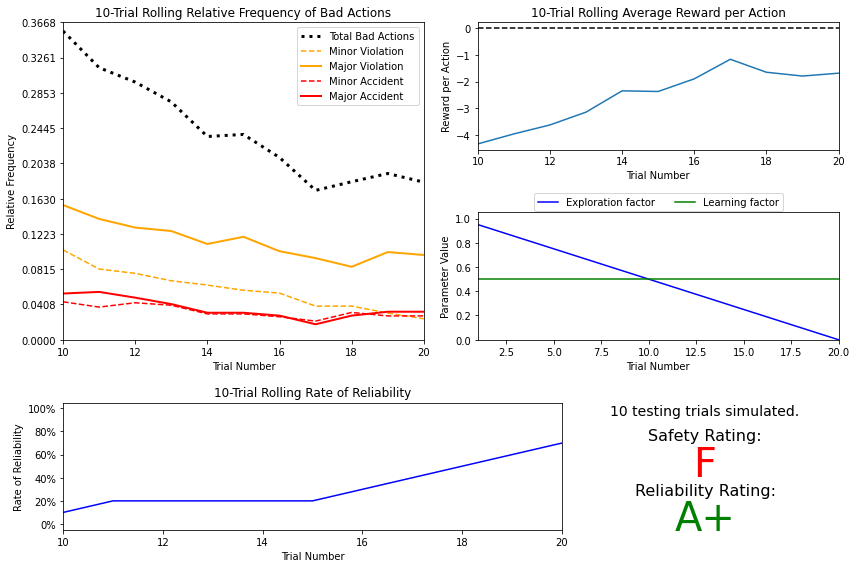

In [10]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
! wget https://raw.githubusercontent.com/alex-coch/alex-coch.github.io/main/smartcab/logs/sim_default-learning.csv
vs.plot_trials('/content/sim_default-learning.csv')

#### Observations after implementing Q-Learning

There isn't much similarity between the basic driving agen and the default Q-Learning agent, as we can see that our agent has already started to learn, based on the visualizations.

- Frequency of total bad actions has dropped down to around 10% from 40% of an agent with no learning, and it keeps going down as the number of training trials increases. We can also see a decrease in the major and minor traffic violations.
- We see an increase in the rate of reliability from 20% to 70% between the 10th and 20th trials.
- There's also an increase in the rolling average of reward per action in a trial, from -3 to 0.5 between the 10th and 20th trials. This is also better than the -5 reward per action in the no-learning driving agent.
- It took 20 trials for the driving agent before testing. This makes sense for the epsilon, tolerance and decay value, since with a linear decay of -0.05 and a starting epsilon of 1, it'll take 20 decays for it to go below the threshold of 0.5.
- We can actually visualize the decay in the visualizations above, as it linearily decreases in a straight line.
- Even with all these improvements, the safety and reliavility ratings of our agent are still F. We'll need further improvements to get better ratings.

-----
## Improving the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step requires a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. 

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, we should use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function we use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

--2022-10-03 13:36:48--  https://raw.githubusercontent.com/alex-coch/alex-coch.github.io/main/smartcab/logs/sim_improved-learning.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33245 (32K) [text/plain]
Saving to: ‘sim_improved-learning.csv.1’

sim_improved-learni 100%[===================>]  32.47K  --.-KB/s    in 0.001s  

2022-10-03 13:36:48 (30.5 MB/s) - ‘sim_improved-learning.csv.1’ saved [33245/33245]



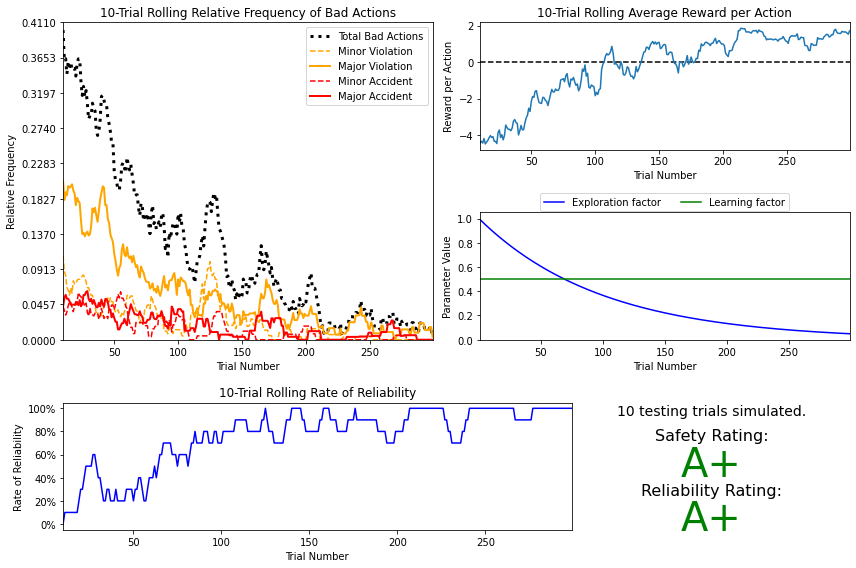

In [11]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
! wget https://raw.githubusercontent.com/alex-coch/alex-coch.github.io/main/smartcab/logs/sim_improved-learning.csv
vs.plot_trials('/content/sim_improved-learning.csv')

#### Observarions after improving Q-Learning Driving Agent

Quick glance at the visualizations show considerable improvements in our driving agent. In more detail:

- The decay function used for the agent is:  $$ \epsilon = a^t, \textrm{for } 0 < a < 1 \ $$
the function ensures that agent favours exploration for approx. the first third of trials, so as to explore the most possible states. Only afterwards, it starts choosing the optimal actions to fine tune the states. 
- Approx. 300 trials were needed for the agent before it began testing.
- Epsilon, tolerance, and alpha rates were kept at default. Although, we chose a constant of 0.99 to start our decay, so that we received the approx. 300 trials which were necessry for training. Since we had 96 possible states to choose from. 300 trials ensures that each state is easily encountered more than once. 
- The improvement has been immense. For 10 testing trials, the agent has received an A+ for both safety and reliability. We can see the improvements in rate of reliability in the visualization for training to approx. 100%. There are improvements in terms of bad actions as well, with a drop to 0% for all negative actions except a slight random increase in major violations. This might be due to the smartcab trying to keep its reliability up and jumping lights when there's no danger. 
- Since the driving agent receives the best rating for both safety and reliability, I would say that the agent has learned the appropriate policy, and the results are satisfactory.

### Defining an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, we can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to our advantage for verifying whether the **policy** the driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Examples of Policies

Let's check out a few examples (using the states we've defined) of what an optimal or sub-optimal policy for this problem would look like. 

To recap, our defined state space was: (waypoint, inputs['light'], inputs['oncoming'], inputs['left'])

A few examples of optimal policy for this problem, with respect to our state space can be:

- State: (forward,red,forward,left)   | Action: None  | Staying idle at a red light.
- State: (right,green,forward,right)  | Action: right | Following the waypoint on a green light. 
- State: (right,red,forward,None)     | Action: right | Taking a right on a red light (allowed in U.S.) if there are no vehicles on the left.

Looking at the entries in the sim_improved_learning.txt file, the policies are mostly correct for the given states. 

For example, looking at the Q table for the following state: ('right', 'red', 'forward', None)
- None : 1.21
- forward : -12.74
- right : 2.12
- left : -10.75

The correct action to take is in fact right, as discussed above (state 3 in the examples).

But there are cases where the recorded policy is in-fact, subotimal. 
For example, looking at the Q table for the following state: 
('forward', 'green', 'forward', 'left')
- None : -4.27
- forward : 0.00
- right : 0.88
- left : -9.91

The policy here is to turn right, while the optimal action would have been to follow the waypoint and move forward, as the car non the left looking to turn left will not because of the traffic lights (which will be red in its case). 

So there are some examples where our agent has not learned the optimal policies in the given amount of training time.